In [16]:
from keras.datasets import boston_housing

In [17]:
import keras

(x_train, y_train), (x_test, y_test) = keras.datasets.boston_housing.load_data()

In [18]:
print("x_train shape", x_train.shape)
print("y_train shape", y_train.shape)
print("x_test shape", x_test.shape)
print("y_test shape", y_test.shape)

x_train shape (404, 13)
y_train shape (404,)
x_test shape (102, 13)
y_test shape (102,)


In [19]:
x_train_mean = x_train.mean(axis=0)
x_train_std = x_train.std(axis=0)

In [20]:
x_train -= x_train_mean
x_train /= x_train_std
x_test -= x_train_mean
x_test /= x_train_std

In [21]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
from keras import initializers, regularizers
from keras.callbacks import EarlyStopping

In [22]:
L1 = 150
L2 = 50

model = Sequential()
model.add(Dense(L1, activation='relu', input_shape=(x_train.shape[1],), kernel_regularizer=regularizers.l2(0.01), kernel_initializer=initializers.he_normal()))
model.add(Dense(L2, activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(1, activation = 'linear'))

In [23]:
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

In [24]:
hist = model.fit(x_train,
                 y_train,
                 epochs=50,
                 batch_size=100,
                 validation_data=(x_test, y_test))

Epoch 1/50
5/5 [==============================] - 1s 35ms/step - loss: 549.9398 - mae: 21.2796 - val_loss: 493.7556 - val_mae: 19.8068
Epoch 2/50
5/5 [==============================] - 0s 8ms/step - loss: 444.5181 - mae: 18.5077 - val_loss: 405.4021 - val_mae: 17.6228
Epoch 3/50
5/5 [==============================] - 0s 8ms/step - loss: 365.2543 - mae: 16.5488 - val_loss: 329.5774 - val_mae: 15.7392
Epoch 4/50
5/5 [==============================] - 0s 7ms/step - loss: 302.8525 - mae: 14.8845 - val_loss: 280.7869 - val_mae: 14.3494
Epoch 5/50
5/5 [==============================] - 0s 9ms/step - loss: 263.1400 - mae: 13.6465 - val_loss: 234.7031 - val_mae: 12.9959
Epoch 6/50
5/5 [==============================] - 0s 8ms/step - loss: 222.9507 - mae: 12.4638 - val_loss: 191.5383 - val_mae: 11.5771
Epoch 7/50
5/5 [==============================] - 0s 8ms/step - loss: 185.6681 - mae: 11.1733 - val_loss: 163.6026 - val_mae: 10.5551
Epoch 8/50
5/5 [==============================] - 0s 9ms/step

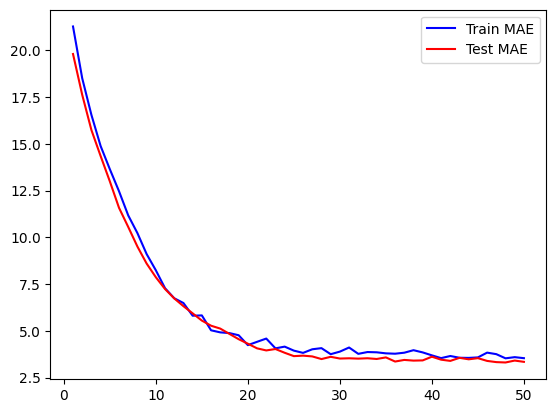

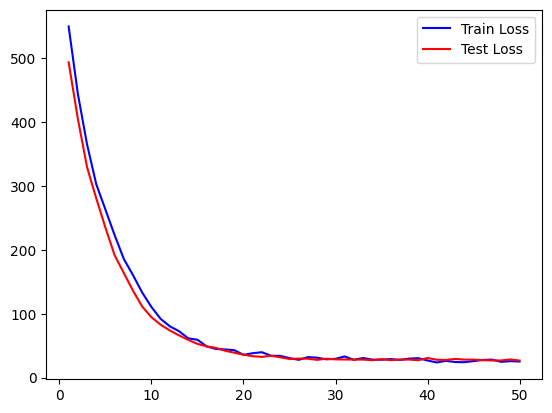

In [25]:
import matplotlib.pyplot as plt

acc = hist.history['mae']
val_acc = hist.history['val_mae']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'b', label = 'Train MAE')
plt.plot(epochs, val_acc, 'r', label = 'Test MAE')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'b', label = 'Train Loss')
plt.plot(epochs, val_loss, 'r', label = 'Test Loss')
plt.legend()
plt.show()